# Optimal sampling design

**Min-var-ht**: Another approach is to opimized the HT estimator's variance 

$$
\begin{cases}
\mathrm{minimize}_Q & \ \mathbb{E}_{S \sim Q}\left[ \sum_{i \in U} \left(\frac{p_i}{\pi_i}\,1(i \in S) - p_i\right)^2 \right] \\
\mathrm{subject\ to}&  Q \in \Delta^{ n \text{ choose } k}  \\
                    & \pi_i = \sum_{S: i \in S} Q(S) \quad\text{for } i \in U
\end{cases}
$$

XXX: embed the best-linear unbiased estimator into this scheme so that the HT part falls out of the k-sparse representation of the sample and an unbiasedness constraint (which we may be able to drop if we want to minimize MSE instead).

$$
\begin{cases}
\mathrm{minimize}_Q & \ \mathbb{E}_{S \sim Q}\left[ \sum_{i \in U} \left(w_i\,1(i \in S) - p_i\right)^2 \right] \\
\mathrm{subject\ to}&  Q \in \Delta^{ n \text{ choose } k}  \\
                    & \sum_{S \in \mathcal{S}} Q(S) \,w_i\,1(i \in S) = p_i \quad\text{for }i \in \mathcal{U}
\end{cases}
$$

XXX: there is still a question of why stop at that choice of form for the estimator?

Let's expand the objective

$$
\begin{align}
\mathbb{E}_{S \sim Q}\left[ \sum_{i \in U} \left(\frac{p_i}{\pi_i}\,1(i \in S) - p_i\right)^2 \right]
&= \mathbb{E}_{S \sim Q}\left[ 
\sum_{i \in U}
   \frac{p_i^2}{\pi_i^2} 1(i \in S)^2
   - 2 p_i \frac{p_i}{\pi_i}\,1(i \in S) 
   + p_i^2 
   \right] \\
&= 
\sum_{i \in U}
   \frac{p_i^2}{\pi_i^2} \mathbb{E}\left[ 1(i \in S)^2 \right]
   - 2 p_i \frac{p_i}{\pi_i}\,\mathbb{E}\left[  1(i \in S) \right]
   + p_i^2 
 \\
&= 
\sum_{i \in U}
   \frac{p_i^2}{\pi_i^2} \pi_i
   - 2 p_i \frac{p_i}{\pi_i}\,\pi_i
   + p_i^2 
 \\
&= 
\sum_{i \in U}
   \frac{p_i^2}{\pi_i}
   - 2 p_i^2
   + p_i^2 
 \\
&= \sum_{i \in U} \frac{p_i^2}{\pi_i} - p_i^2  \\
\end{align}
$$

We can drop the $p_i^2$ term because it is constant wrt Q.
$$
\begin{cases}
\mathrm{minimize}_Q & \sum_{i \in U} \frac{p_i^2}{\pi_i} \\
\mathrm{subject\ to}&  Q \in \Delta^{ n \text{ choose } k}  \\
                    & \pi_i = \sum_{S: i \in S} Q(S) \quad\text{for } i \in U
\end{cases}
$$

$$
\begin{cases}
\mathrm{minimize}_Q & \sum_{i \in U} \frac{p_i^2}{\pi_i} \\
\mathrm{subject\ to}& \pi_i = \sum_{S \in \mathcal{S}: i \in S} Q(S) \quad\text{for } i \in U \\
                    & \sum_{S \in \mathcal{S}} Q(S) = 1 \\
                    & Q(S) \ge 0 \quad\text{for }S \in \mathcal{S}
\end{cases}
$$

I'm going to ignore drop the positivity constraints, which will turn out not to matter.

$$
L(Q, \lambda) 
= \sum_{i \in U} \frac{p_i^2}{\pi_i}
+ \lambda_i \, \left(\pi_i - \sum_{S \in \mathcal{S}: i \in S} Q(S) \right)
+ \zeta \, \left(\sum_{S \in \mathcal{S}} Q(S) - 1\right)
$$

$$
\begin{align}
0 
&= \nabla_{Q(S')} \left[ L(Q, \lambda) \right] \\
&= \nabla_{Q(S')} \left[ \sum_{i \in U} \frac{p_i^2}{\pi_i}
+ \lambda_i \, \left(\pi_i - \sum_{S \in \mathcal{S}: i \in S} Q(S) \right)
+ \zeta \, \left(\sum_{S \in \mathcal{S}} Q(S) - 1\right) \right] \\
&= -\sum_{i \in S'} \lambda_i 
+ \zeta  \\
\zeta &= \sum_{i \in S'} \lambda_i 
\end{align}
$$

$$
\begin{align}
0 
&= \nabla_{\pi_j} \left[ L(Q, \lambda) \right] \\
&= \nabla_{\pi_j} \left[ \sum_{i \in U} \frac{p_i^2}{\pi_i}
+ \lambda_i \, \left(\pi_i - \sum_{S \in \mathcal{S}: i \in S} Q(S) \right)
+ \zeta \, \left(\sum_{S \in \mathcal{S}} Q(S) - 1\right) \right] \\
&= \nabla_{\pi_j} \left[  \frac{p_j^2}{\pi_j} \right]
+ \lambda_j \\
&= -\frac{p_j^2}{\pi_j^2}
+ \lambda_j \\
\lambda_j &= \frac{p_j^2}{\pi_j^2} \\
\sqrt{\lambda_j} &= \sqrt{\frac{p_j^2}{\pi_j^2}} \\
\sqrt{\lambda_j} &= \frac{p_j}{\pi_j} \\
\pi_j &= \frac{p_j}{\sqrt{\lambda_j}} \\
\pi_j &= K\, p_j
\end{align}
$$

$$
\begin{align}
p_j K &= \sum_{S \in \mathcal{S}: j \in S} Q(S) \\
1 &= \sum_{S \in \mathcal{S}} Q(S)
\end{align}
$$

So, the bottom line appears to be that the first-order optimality conditions imply that inclusion probabilities $\pi$ proportional to $p$.  Is that all?  Well, the next question is whether or not the objective and the constraints are convex. 

- constraints? yes, they are clearly linear in $Q$ and $\pi$.

- objective? It is not immediately obvious whether a sum of positive constant $\pi_i^{-1}$ is convex.  We know that a positive sum of convex functions is convex.  So if we can argue that each $\pi_i^{-1}$ is convex, we're golden.  The function $\pi_i^{-1}$ is clearly convex over $\pi_i \in (0,\infty)$. We require $\pi$ to be positive. Thus, the objective is convex over the feasible region.

Furthermore, any objective that satisfies the first-order conditions and manages to only sample sets of size $K$ is an optimal design wrt the HT estimation scheme's variance.


In [26]:
from arsenal import Integerizer
from arsenal.maths import random_dist, softmax
from arsenal.maths.combinatorics import choose
from collections import Counter
from scipy.optimize import minimize
from scipy.special import binom 

In [27]:
class Thing:
    def __init__(self, W, n, k):
        assert len(W) == binom(n, k)
        self.p1 = np.zeros(n)
        self.U = list(range(n))
        self.ix = Integerizer(list(choose(self.U, k)))
        P = Counter()
        for Y, t in self.ix.items():
            w = W[t]
            P[frozenset(Y)] = w
            for i in Y:
                self.p1[i] += w
        self.P = dict(P)
        self.W, self.n, self.k = W, n, k

    def objective(self, p):
        return sum((p[i]**2 / self.p1[i]) - p[i]**2 for i in self.U)
        
    def gradient(self, p):
        g = np.zeros_like(self.W)
        for Sp, t in self.ix.items():
            for i in Sp:
                g[t] += -p[i]**2 / self.p1[i]**2
        return g
    
    def sample(self):
        domain = list(self.P.keys())
        i = sample(list(self.P.values()))
        return domain[i]

    def show(self):
        for prob, s in sorted(zip(self.P.values(), self.P.keys()), reverse=True):
            if prob > 1e-5:
                print(f'{prob:.3}: {sorted(s)}')

In [28]:
n = 10; k = 3
p = random_dist(n)

In [29]:
sol = minimize(
    lambda theta: Thing(softmax(theta), n=n, k=k).objective(p),
    np.zeros(int(binom(n,k)))
)

Dopt = Thing(softmax(sol.x), n=n, k=k)

In [30]:
#Dopt.show()

In [31]:
from arsenal.maths import fdcheck

100.0% (120/120) [====================================================] 00:00:00



Comparison: n=120
  norms: [6.66738, 6.66738]
  zero F1: 1
  pearson: 1
  spearman: 1
  ℓ∞: 1.79809e-09
  ℓ₂: 8.97277e-09
  same-sign: 100.0% (120/120)
  regression: [1.000 0.000]
  got is larger: 100.0% (120/120)



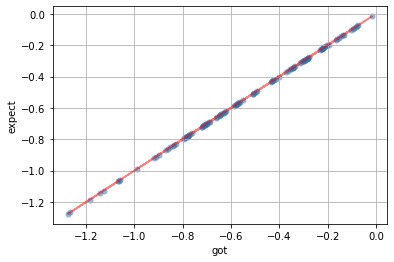

In [32]:
theta = random_dist(int(binom(n,k)))
fdcheck(lambda: Thing(theta, n, k).objective(p), theta, Thing(theta, n, k).gradient(p), throw=False).show();

The optimality conditions say that the inclusion probabilities $\pi_j \propto p_j$.

In [33]:
compare(Dopt.p1, p*k);


Comparison: n=10
  norms: [1.13761, 1.13762]
  zero F1: 1
  pearson: 1
  spearman: 1
  ℓ∞: 7.81942e-05
  ℓ₂: 0.000153289
  same-sign: 100.0% (10/10)
  regression: [1.000 0.000]



## Optimality of threshold sampling

Below, $\sum_{i=1}^n \pi_i = k$ constrains the expected sample size if schemes samples $n$ independent Bernoulli with parameters $\pi_i$.

$$
\begin{cases}
\underset{{\pi_1, \ldots \pi_n}}{\mathrm{minimize}}\
   & \sum_{i=1}^n \frac{p_i^2}{\pi_i} \\
\mathrm{subject\ to} 
  & \sum_{i=1}^n \pi_i = k \\
  & 0 \le \pi_1, \ldots \pi_n \le 1
\end{cases}
$$

$$
L(\pi_1, \ldots \pi_n, \lambda) 
= \sum_{i=1}^n \frac{p_i^2}{\pi_i}
- \lambda \left(k - \sum_{i=1}^n \pi_i \right)
$$

$$
\begin{align}
0 
&= \nabla_{q_j} L(\pi_1, \ldots \pi_n, \lambda) \\
&= \nabla_{q_j}\left[ \sum_{i=1}^n \frac{p_i^2}{\pi_i}
- \lambda \left(k - \sum_{i=1}^n \pi_i \right) \right] \\
&= \nabla_{q_j}\left[ \frac{p_j^2}{\pi_j} \right]
+ \lambda \\
&= \nabla_{q_j}\left[ \frac{p_j^2}{\pi_j} \right]
+ \lambda \\
&= - \frac{p_j^2}{\pi_j^2}
+ \lambda \\
p_j^2 &= 
\lambda \pi_j^2 \\
\sqrt{p_j^2} &= 
\sqrt{\lambda \pi_j^2} \\
\frac{p_j}{\sqrt{\lambda}} &= 
\pi_j \\
\end{align}
$$

Renaming variables $\sqrt{k \lambda} \mapsto \tau$ and applying the between-0-and-1 constraints on $\pi$, we can see that the solution has the following form,

$$
\pi_j = \min\left(1, \frac{p_j}{\tau}\right)
$$

where $\tau > 0$ is a value that satisfies the sum-to-k constraint.  Note that the $\ge 0$ constraint is always satisifed if $\tau > 0$.

In [34]:
from swor.cps import ConditionalPoissonSampling as CPS

def opt_cps(p, k):
    # I think we can also optimize the KL divergence because it will give rise to an 
    # objective with this as its first-order optimality condition.
    sol = minimize(
        lambda w: np.sum((CPS(np.exp(w), k).inclusion() - k*p)**2),
        np.zeros(n)
    )
    return CPS(np.exp(sol.x), k)


Comparison: n=10
  norms: [1.13762, 1.13762]
  zero F1: 1
  pearson: 1
  spearman: 1
  ℓ∞: 1.54364e-05
  ℓ₂: 2.69127e-05
  same-sign: 100.0% (10/10)
  regression: [1.000 -0.000]



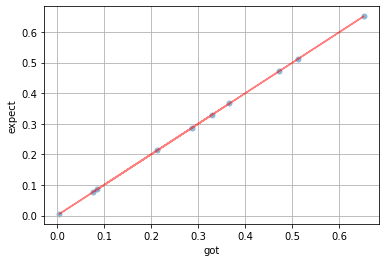

In [36]:
#k = 10
#n = 50
#p = random_dist(n)

m = opt_cps(p, k)
compare(m.inclusion(), p*k).show();

In [37]:
from arsenal import iterview
#models = [opt_cps(p, t) for t in iterview(range(1, k+1))]

In [38]:
#pl.matshow([m.inclusion() for m in models])

In [39]:
#pl.matshow([np.log(m.v) for m in models])

Faster methods for fitting the distributions. 

XXX: I'm pretty sure there is an exponentiated gradient method that will be much faster.

In [40]:
lc = []
w = np.ones(n)
for t in iterview(range(1, 10_000)):
    q = CPS(w, k).inclusion()
    r = p*k - q
    w1 = np.maximum(0, w + r / t)
    if t % 100 == 0: 
        #err = np.linalg.norm(w - w1)
        err = np.linalg.norm(r)
        lc.append([t, err])
    w = w1

100.0% (9999/9999) [==================================================] 00:00:01


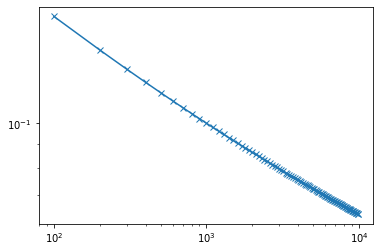

In [41]:
xs, ys = np.array(lc).T
pl.loglog(xs, ys, marker='x');

In [42]:
mm = opt_cps(p, k)


Comparison: n=10
  norms: [1.11135, 1.13762]
  zero F1: 1
  pearson: 0.997739
  spearman: 1
  ℓ∞: 0.054866
  ℓ₂: 0.0635672
  same-sign: 100.0% (10/10)
  regression: [0.920 0.024]



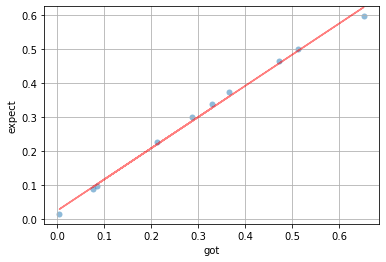

In [47]:
compare(CPS(w, k).inclusion(), CPS(mm.v, k).inclusion()).show();

The [these slides](http://www.mathstat.helsinki.fi/msm/banocoss/2011/Presentations/Bondesson_web.pdf) describe the relationship between CPS parameters and inclusion probabilities.


Comparison: n=10
  norms: [2.42234, 7.94604]
  zero F1: 1
  pearson: 0.999997
  spearman: 1
  ℓ∞: 3.91244
  ℓ₂: 5.5237
  same-sign: 100.0% (10/10)
  regression: [0.304 0.001]
  got is larger: 100.0% (10/10)



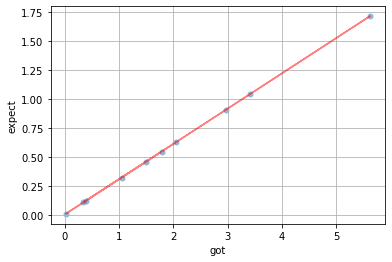

In [45]:
pi = p * k
ww = pi/(1-pi) * np.exp((0.5 - pi) / (pi @ (1-pi)))

#compare(np.log(ww), np.log(mm.v)).show();
compare(ww, mm.v).show();